# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [2]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2023-01-06 11:18:02--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.002s  

2023-01-06 11:18:02 (25.5 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,28,102,45,85,193,64,6,192,33,22,146,217,570,163,76,6,7,195,193
1,158,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196
2,790,85,43,66,120,54,5,148,46,19,145,168,320,174,87,8,2,179,181
3,202,111,54,103,171,50,11,221,30,25,172,227,727,201,69,15,6,190,198
4,525,92,45,76,162,57,7,159,41,20,147,184,381,177,69,8,10,190,195
5,327,89,44,82,136,54,6,149,45,19,144,170,332,168,68,10,14,188,193
6,485,83,46,71,156,70,6,151,44,19,147,174,338,198,80,3,11,181,186
7,275,87,44,70,179,75,6,146,45,19,141,167,326,178,69,6,1,194,201
8,560,105,55,96,181,56,9,219,30,25,175,231,713,216,74,4,5,187,194
9,798,103,56,100,185,59,11,216,31,24,173,219,684,219,75,15,11,186,194


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,435.608379,93.568306,44.724954,81.863388,168.921676,61.624772,8.459016,168.510018,40.992714,20.553734,147.593807,188.278689,438.366120,173.965392,72.222222,6.173042,12.404372,189.120219,195.708561
std,242.167534,8.051464,6.160189,15.737163,33.152095,7.499964,4.187296,33.128846,7.861016,2.587048,14.590294,30.882883,175.403369,32.137318,6.850714,4.918786,9.060646,6.187471,7.389746
min,5.000000,77.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,231.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,136.000000,167.000000,319.000000,148.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,434.000000,92.000000,44.000000,78.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,178.000000,363.000000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,644.000000,100.000000,49.000000,98.000000,196.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.000000,198.000000,75.000000,9.000000,19.000000,194.000000,201.000000
max,844.000000,115.000000,58.000000,112.000000,322.000000,133.000000,55.000000,265.000000,61.000000,29.000000,182.000000,288.000000,1018.000000,264.000000,119.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
### YOUR CODE HERE
# Ниже после текстовой части

1. Пропуски данных отсутствуют согласно информации из метода info.
2. Все признаки - количественные, нет категориальных.
3. Выборка уже разделена на обучающую и тестовую.

In [5]:
# Нормализация данных на стандартное отклонение. Требуется для реализации логистической регрессии, PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [6]:
# Проверим какие значения принимает целевая переменная (метки классов)
np.unique(y_train)

array(['bus', 'opel', 'saab', 'van'], dtype=object)

In [7]:
# Для корректной работы методам требуется подавать на вход числовые данные. Перекодируем метки класса в числа.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()    
y_train_encode = label_encoder.fit_transform(y_train) 
y_test_encode = label_encoder.fit_transform(y_test) 

np.unique(y_train_encode)

array([0, 1, 2, 3])

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
model.fit(X_train_norm, y_train_encode)
y_pred = model.predict(X_test_norm)

results = model.score(X_test_norm, y_test_encode)

print("accuracy: {}".format(results))
print("F1 score:", f1_score(y_test_encode, y_pred, average='weighted'))

accuracy: 0.7912457912457912
F1 score: 0.7892098597780248


In [9]:
### YOUR CODE HERE
# Найдем оптимальные гиперпараметры модели с помощью метода GridSearchCV
from sklearn.model_selection import GridSearchCV

penaltys = ['l1', 'l2']
c_space = np.linspace(0.1, 5, 20)

hyperparameters = dict(C=c_space, penalty=penaltys)

model_lr = LogisticRegression(hyperparameters, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
model_cv = GridSearchCV(model_lr, hyperparameters, cv=5, scoring='accuracy')

best_model = model_cv.fit(X_train_norm, y_train_encode)

best_penalty = best_model.best_estimator_.get_params()['penalty']
best_c = best_model.best_estimator_.get_params()['C']

print('Best Penalty', best_penalty)
print('Best C', best_c)


Best Penalty l1
Best C 4.484210526315789


In [10]:
# Вычислим accuracy и f1 score для модели с подобранными оптимальными гиперпараметрами
model_lr_bp = LogisticRegression(C = best_c, penalty = best_penalty, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
model_lr_bp.fit(X_train_norm, y_train_encode)
y_pred_lr_bp = model_lr_bp.predict(X_test_norm)
scores = model_lr_bp.score(X_test_norm, y_test_encode)

print("accuracy: {}".format(scores))
print("F1 score:", f1_score(y_test_encode, y_pred_lr_bp, average='weighted'))


accuracy: 0.8013468013468014
F1 score: 0.8000531710717773


In [11]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


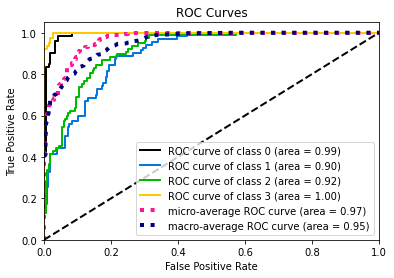

In [12]:
import scikitplot

y_pred_proba = model_lr_bp.predict_proba(X_test_norm)

scikitplot.metrics.plot_roc(y_test_encode, y_pred_proba)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

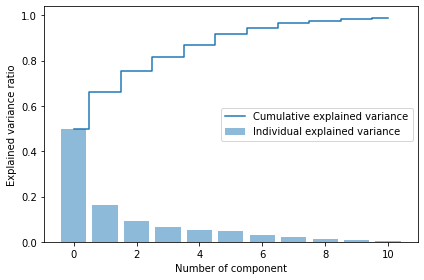

In [13]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(0.99)
pca.fit(X_train_norm)
explained_var = pca.explained_variance_ratio_
explained_var_cumsum = np.cumsum(explained_var)

plt.bar(range(0,len(explained_var)), explained_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(explained_var_cumsum)), explained_var_cumsum, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Number of component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
### YOUR CODE HERE
# При применении метода PCA нормализация данных обязательна, иначе данные о весе признака в объясняющей дисперсии будут некорректными
# Нормализация данных выполнена ранее

In [14]:
# При применении PCA мы установили параметр равный 0.99. Это даст нам оптимальное количество параметров для объясненной дисперсии = 99%
pca.n_components_

11

In [15]:
X_train_pca = pca.fit_transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [16]:
### YOUR CODE HERE

model_lr_pca = LogisticRegression(hyperparameters, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
model_cv_pca = GridSearchCV(model, hyperparameters, cv=5, scoring='accuracy')

best_model_pca = model_cv.fit(X_train_pca, y_train_encode)

best_penalty_pca = best_model_pca.best_estimator_.get_params()['penalty']
best_c_pca = best_model.best_estimator_.get_params()['C']

print('Best Penalty (PCA)', best_penalty_pca)
print('Best C (PCA)', best_c_pca)

Best Penalty (PCA) l1
Best C (PCA) 0.8736842105263158


In [17]:
model_lr_pca_bp = LogisticRegression(C = best_c_pca, penalty = best_penalty_pca, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
model_lr_pca_bp.fit(X_train_pca,y_train_encode)
y_pred_pca = model_lr_pca_bp.predict(X_test_pca)
scores = model_lr_pca_bp.score(X_test_pca, y_test_encode)

print("accuracy: {}".format(scores))
print("F1 score:", f1_score(y_test_encode, y_pred_pca, average='weighted'))

accuracy: 0.7373737373737373
F1 score: 0.7350389964615819


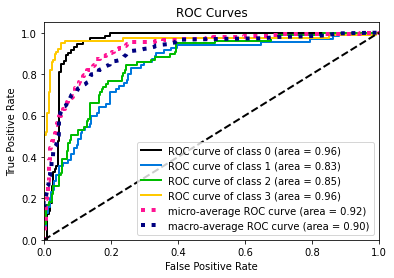

In [18]:
y_pred_proba_pca = model_lr_pca_bp.predict_proba(X_test_pca)

scikitplot.metrics.plot_roc(y_test_encode, y_pred_proba_pca)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [19]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
max_depth = {"max_depth": np.arange(3, 26)}

model_tree = DecisionTreeClassifier()
model_tree_cv = GridSearchCV(model_tree, max_depth, cv=5, scoring='accuracy')

best_model_tree = model_tree_cv.fit(X_train_norm, y_train_encode)

best_parameter= best_model_tree.best_estimator_.get_params()['max_depth']

print('max_depth', best_parameter)

max_depth 19


In [20]:
model_tree_bp = DecisionTreeClassifier(max_depth=best_parameter)
model_tree_bp.fit(X_train_norm, y_train_encode)
y_pred_tree = model_tree_bp.predict(X_test_norm)
scores_tree = model_tree_bp.score(X_test_norm, y_test_encode)

print("accuracy: {}".format(scores_tree))
print("F1 score:", f1_score(y_test_encode, y_pred_tree, average='weighted'))

accuracy: 0.696969696969697
F1 score: 0.7008063790794294


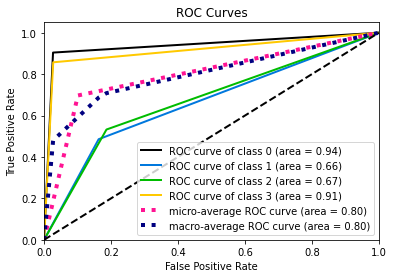

In [21]:
y_pred_proba_tree = model_tree_bp.predict_proba(X_test_norm)

scikitplot.metrics.plot_roc(y_test_encode, y_pred_proba_tree)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [22]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

n_estimates = np.arange(2, 100, 5)
baggs_lr = []
baggs_tree = []
for n_estimators in n_estimates:
  bagg_lr = BaggingClassifier(base_estimator=model_lr_bp, n_estimators=n_estimators, random_state=41).fit(X_train_norm, y_train_encode)
  bagg_tree = BaggingClassifier(base_estimator=model_tree_bp, n_estimators=n_estimators, random_state=41).fit(X_train_norm, y_train_encode)
  pred_lr = bagg_lr.predict(X_test_norm)
  pred_tree = bagg_tree.predict(X_test_norm)

  baggs_lr.append(bagg_lr)
  baggs_tree.append(bagg_tree)

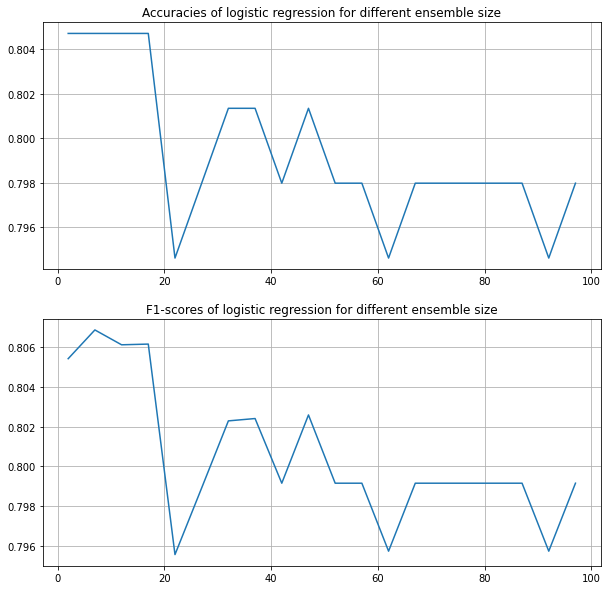

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

accuracies_lr = [accuracy_score(baggs_lr[i].predict(X_test_norm), y_test_encode) for i in range(len(n_estimates))]
f1_lr = [f1_score(baggs_lr[i].predict(X_test_norm), y_test_encode,average='weighted') for i in range(len(n_estimates))]

ax[0].set_title('Accuracies of logistic regression for different ensemble size')
ax[0].plot(n_estimates, accuracies_lr)
ax[0].grid()
ax[1].set_title('F1-scores of logistic regression for different ensemble size')
ax[1].plot(n_estimates, f1_lr)
ax[1].grid()

Исходя из графика, оптимальным значением N для логистической регрессии будет 12. 


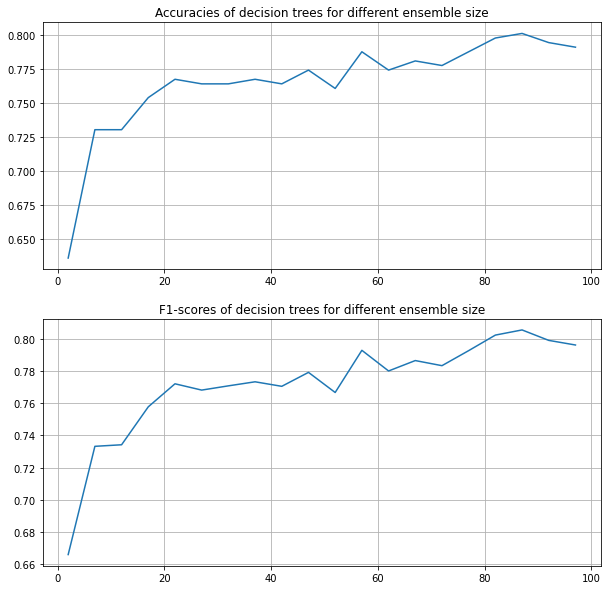

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

accuracies_tree = [accuracy_score(baggs_tree[i].predict(X_test_norm), y_test_encode) for i in range(len(n_estimates))]
f1_tree = [f1_score(baggs_tree[i].predict(X_test_norm), y_test_encode,average='weighted') for i in range(len(n_estimates))]

ax[0].set_title('Accuracies of decision trees for different ensemble size')
ax[0].plot(n_estimates, accuracies_tree)
ax[0].grid()
ax[1].set_title('F1-scores of decision trees for different ensemble size')
ax[1].plot(n_estimates, f1_tree)
ax[1].grid()

Исходя из графика, оптимальным значением N для деревьев будет 57.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

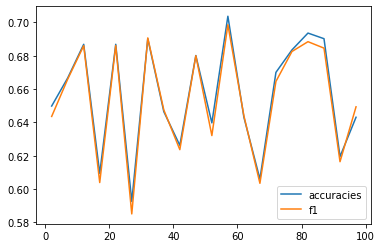

In [25]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
for n_estimators in n_estimates:
  model_rf = RandomForestClassifier(n_estimators=n_estimators)
  model_rf.fit(X_train_norm, y_train_encode)
  pred_rf = model_rf.predict(X_test_norm)

accuracies = [accuracy_score(model_rf[i].predict(X_test_norm), y_test_encode) for i in range(len(n_estimates))]
f1 = [f1_score(model_rf[i].predict(X_test_norm), y_test_encode,average='weighted') for i in range(len(n_estimates))]

plt.plot(n_estimates,accuracies, label="accuracies")
plt.plot(n_estimates, f1, label="f1")
plt.legend()

Оптимальное количество деревьев (около 55) близко к тому значению, что мы получили в предыдущем пункте.

При этом при логистической регрессии удается достигнуть более высокой точности.


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [35]:
# YOUR CODE HERE
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X_train_norm, y_train_encode)

split_idx = [[]]*10
for i, (train_index, test_index) in enumerate(skf.split(X_train_norm, y_train_encode)):
    split_idx[i] = split_idx[i-1] + list(train_index) + list(test_index)

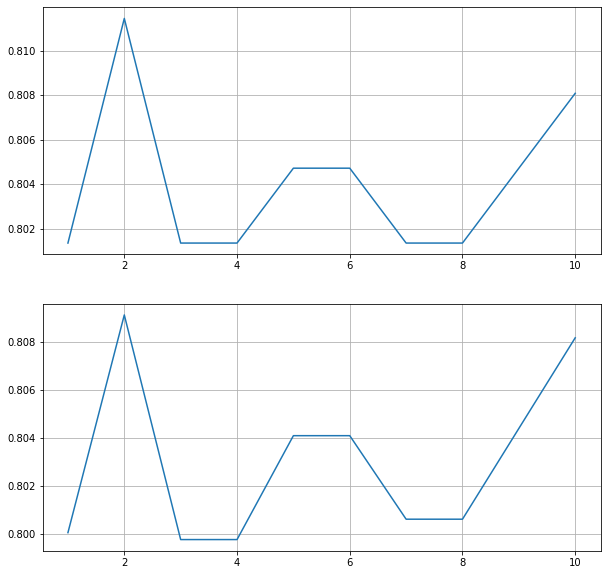

In [39]:
accuracy_lr_parts = []
f1_lr_parts = []

for inds in split_idx:
  model_lr_parts = LogisticRegression(C = best_c, penalty = best_penalty, 
                           multi_class='multinomial', solver='saga', tol=1e-3, 
                           max_iter=500)
  model_lr_parts.fit(X_train_norm[inds], y_train_encode[inds])
  pred_lr_parts = model_lr_parts.predict(X_test_norm)
  accuracy_lr_parts.append(accuracy_score(y_test_encode, pred_lr_parts))
  f1_lr_parts.append(f1_score(y_test_encode, pred_lr_parts, average='weighted'))

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(np.arange(1, len(split_idx)+1, 1), accuracy_lr_parts)
ax[0].grid()
ax[1].plot(np.arange(1, len(split_idx)+1, 1), f1_lr_parts)
ax[1].grid()

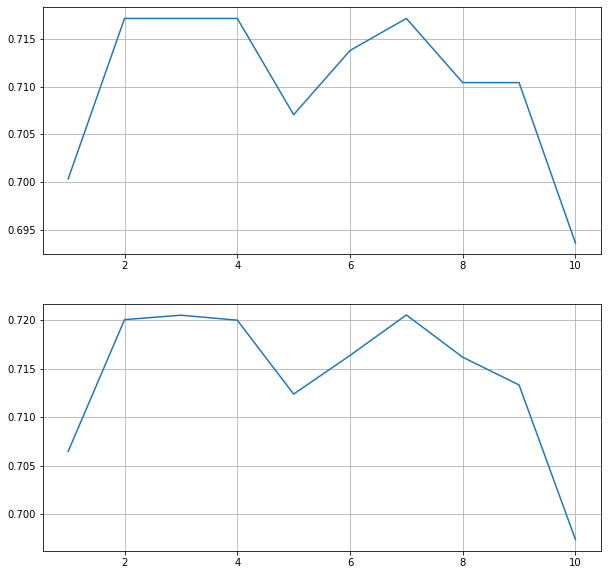

In [40]:
accuracy_tree_parts = []
f1_tree_parts = []

for inds in split_idx:
  model_tree_parts = DecisionTreeClassifier(max_depth=best_parameter)
  model_tree_parts.fit(X_train_norm[inds], y_train_encode[inds])
  pred_tree_parts = model_tree_parts.predict(X_test_norm)
  accuracy_tree_parts.append(accuracy_score(y_test_encode, pred_tree_parts))
  f1_tree_parts.append(f1_score(y_test_encode, pred_tree_parts, average='weighted'))

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(np.arange(1, len(split_idx)+1, 1), accuracy_tree_parts)
ax[0].grid()
ax[1].plot(np.arange(1, len(split_idx)+1, 1), f1_tree_parts)
ax[1].grid()

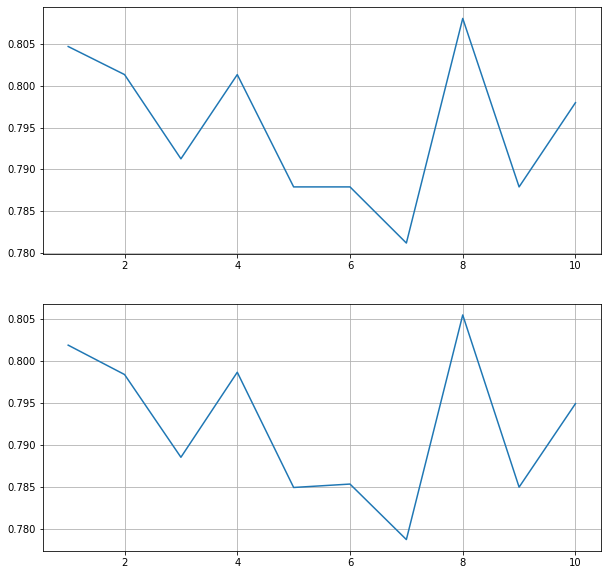

In [41]:
accuracy_rf_parts = []
f1_rf_parts = []

for inds in split_idx:
  model_rf_parts = RandomForestClassifier(n_estimators=n_estimators, max_depth=best_parameter)
  model_rf_parts.fit(X_train_norm[inds], y_train_encode[inds])
  pred_rf_parts = model_rf_parts.predict(X_test_norm)
  accuracy_rf_parts.append(accuracy_score(y_test_encode, pred_rf_parts))
  f1_rf_parts.append(f1_score(y_test_encode, pred_rf_parts, average='weighted'))

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

ax[0].plot(np.arange(1, len(split_idx)+1, 1), accuracy_rf_parts)
ax[0].grid()
ax[1].plot(np.arange(1, len(split_idx)+1, 1), f1_rf_parts)
ax[1].grid()

Вывод: во всех используемых алгоритмах можно заметить, что достаточная точность достигается на части данных. Таким образом, мы можем производить отбор моделей на меньшем объеме данных.